In [793]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly 
import pandas as pd

In [794]:
plotly.tools.set_credentials_file(username='temp2019', api_key='dOVAo2AwluLUBNtmj6lA')

In [795]:
train = pd.read_csv('data/train.csv')
train.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    15000.0   36 months     11.99       498.15     B        B3   
1     3725.0   36 months      6.03       113.38     A        A1   
2    16000.0   36 months     11.14       524.89     B        B2   
3     4200.0   36 months     13.33       142.19     C        C3   
4     6500.0   36 months     12.69       218.05     B        B5   

                      emp_title emp_length home_ownership  annual_inc  ...  \
0  Quality Assurance Specialist    4 years       MORTGAGE     70000.0  ...   
1                           NaN        NaN       MORTGAGE     52260.0  ...   
2                     KIPP NYC     3 years           RENT     67500.0  ...   
3                  Receptionist   < 1 year       MORTGAGE     21600.0  ...   
4           Medtox Laboratories  10+ years           RENT     41000.0  ...   

  total_acc initial_list_status  collections_12_mths_ex_med policy_code  \
0      32.0                   f                         0.0         1.0   
1       9.0                   f                         0.0         1.0   
2      22.0                   f                         0.0         1.0   
3      19.0                   w                         0.0         1.0   
4      12.0                   f                         0.0         1.0   

  application_type acc_now_delinq tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
0       INDIVIDUAL            0.0          0.0     295215.0           20500.0   
1       INDIVIDUAL            0.0          0.0      25130.0           14200.0   
2       INDIVIDUAL            0.0        193.0      41737.0           19448.0   
3       INDIVIDUAL            0.0        165.0      28187.0           14500.0   
4       INDIVIDUAL            0.0          NaN          NaN               NaN   

   record_id  
0  453246940  
1  453313687  
2  453283543  
3  453447199  
4  453350283  

[5 rows x 36 columns]

In [796]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 36 columns):
loan_amnt                     200189 non-null float64
term                          200189 non-null object
int_rate                      200189 non-null float64
installment                   200189 non-null float64
grade                         200189 non-null object
sub_grade                     200189 non-null object
emp_title                     189062 non-null object
emp_length                    192135 non-null object
home_ownership                200189 non-null object
annual_inc                    200189 non-null float64
verification_status           200189 non-null object
issue_d                       200189 non-null object
loan_status                   200189 non-null int64
pymnt_plan                    200189 non-null object
purpose                       200189 non-null object
zip_code                      200189 non-null object
addr_state                    200189 n

In [797]:
data = train.loc[:,['annual_inc','verification_status','int_rate','initial_list_status','term',
                 'installment','open_acc','total_acc','dti','purpose','tot_cur_bal',
                 'sub_grade','home_ownership','inq_last_6mths','total_rev_hi_lim',
                 'revol_bal','revol_util',
                 'tot_coll_amt','loan_amnt',] ]
y = train['loan_status']

In [798]:
def Nan_killer(x):
   # x['collections_12_mths_ex_med'] = x['collections_12_mths_ex_med'].fillna(0)
    categorical_features_names = x_train.columns
    if 'revol_utl' in categorical_features_names:
        x['revol_util'] = x['revol_util'].fillna(-999)
    if 'tot_coll_amt' in categorical_features_names:
        x['tot_coll_amt'] = x['tot_coll_amt'].fillna(-999)
    if 'tot_cur_bal' in categorical_features_names:
        x['tot_cur_bal'] =  x['tot_cur_bal'].fillna(-999)
    if 'total_rev_hi_lim' in categorical_features_names:
         x['total_rev_hi_lim'] =  x['total_rev_hi_lim'].fillna(-999)

In [799]:
Nan_killer(data)

In [800]:
categorical_features_names = data.columns[data.dtypes == 'object']
categorical_features_indices = [data.columns.get_loc(i) for i in categorical_features_names]

In [801]:
categorical_features_names

Index(['verification_status', 'initial_list_status', 'term', 'purpose',
       'sub_grade', 'home_ownership'],
      dtype='object')

In [802]:
if 'purpose' in categorical_features_names:
    data['purpose'] = data['purpose'].astype(str).map(lambda x: 'other' if x in ['educational', 'renewable_energy','vacation','house','wedding','moving','medical','car','small_business','major_purchase'] else x)

In [803]:
if 'sub_grade' in categorical_features_names:
    data['sub_grade'] = data['sub_grade'].astype('str').map(lambda x: ord(x[0])*10 + int(x[1]))

In [804]:
if 'home_ownership' in categorical_features_names:
    data['home_ownership'] = data['home_ownership'].astype(str).map(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)

In [805]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 19 columns):
annual_inc             200189 non-null float64
verification_status    200189 non-null object
int_rate               200189 non-null float64
initial_list_status    200189 non-null object
term                   200189 non-null object
installment            200189 non-null float64
open_acc               200189 non-null float64
total_acc              200189 non-null float64
dti                    200189 non-null float64
purpose                200189 non-null object
tot_cur_bal            200189 non-null float64
sub_grade              200189 non-null int64
home_ownership         200189 non-null object
inq_last_6mths         200189 non-null float64
total_rev_hi_lim       200189 non-null float64
revol_bal              200189 non-null float64
revol_util             200035 non-null float64
tot_coll_amt           200189 non-null float64
loan_amnt              200189 non-null float64
dty

In [806]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state = 42)

In [807]:
categorical_features_names = data.columns[data.dtypes == 'object']
categorical_features_indices = [data.columns.get_loc(i) for i in categorical_features_names]
categorical_features_names

Index(['verification_status', 'initial_list_status', 'term', 'purpose',
       'home_ownership'],
      dtype='object')

## K-means

* dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* total_rev_hi_lim  - Total revolving high credit/credit limit
* inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [850]:
from sklearn.cluster import KMeans

In [851]:
x =  x_train.loc[:,['total_rev_hi_lim','inq_last_6mths','dti']]
x['total_rev_hi_lim'] = x['total_rev_hi_lim'].fillna(0)
x['total_rev_hi_lim'] = x['total_rev_hi_lim']/10000
x.head()

total_rev_hi_lim  inq_last_6mths    dti
193136            4.3599             2.0  26.85
27784             2.4100             2.0  16.47
157132            5.4800             2.0  13.50
81962            -0.0999             3.0  20.48
161               2.5100             2.0  14.00

In [852]:
kmeans = KMeans(n_clusters=4, random_state=42, n_jobs = -1, init = 'k-means++').fit(x)

In [853]:
kmeans.labels_

array([2, 1, 1, ..., 0, 0, 3])

In [854]:
y_kmeans = kmeans.fit_predict(x)

In [855]:
kmeans.cluster_centers_

array([[ 2.24972646,  0.86953322, 20.95251057],
       [ 2.20248236,  0.85239108, 13.80131943],
       [ 3.04244296,  0.84087305, 29.33194478],
       [ 1.63960805,  0.84037528,  6.39761547]])

In [856]:
col = list(x.columns)

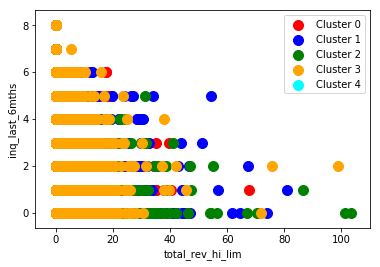

In [857]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[0]], x[y_kmeans == 0][col[1]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[0]], x[y_kmeans == 1][col[1]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[0]], x[y_kmeans == 2][col[1]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[0]], x[y_kmeans == 3][col[1]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[0]], x[y_kmeans == 4][col[1]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[0])
plt.ylabel(col[1])
plt.legend()

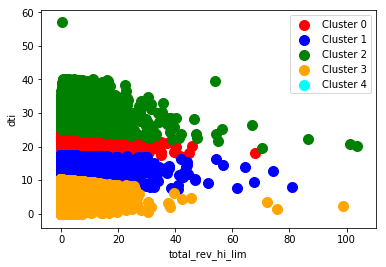

In [858]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[0]], x[y_kmeans == 0][col[2]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[0]], x[y_kmeans == 1][col[2]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[0]], x[y_kmeans == 2][col[2]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[0]], x[y_kmeans == 3][col[2]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[0]], x[y_kmeans == 4][col[2]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[0])
plt.ylabel(col[2])
plt.legend()

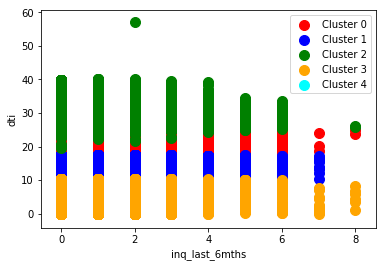

In [859]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[1]], x[y_kmeans == 0][col[2]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[1]], x[y_kmeans == 1][col[2]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[1]], x[y_kmeans == 2][col[2]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[1]], x[y_kmeans == 3][col[2]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[1]], x[y_kmeans == 4][col[2]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[1])
plt.ylabel(col[2])
plt.legend()

In [860]:
from mpl_toolkits.mplot3d import Axes3D

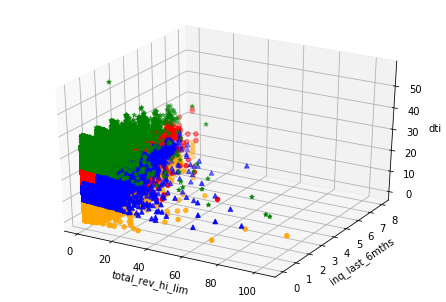

In [861]:
fig = plt.figure()
ax = Axes3D(fig)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i,c, m  in [(0,'red', 'o'), (1,'blue', '^'),(2,'green', '*'),(3,'orange', 'o'),(4,'cyan', 'o')]:
    xs = x[y_kmeans == i][col[0]]
    ys = x[y_kmeans == i][col[1]]
    zs = x[y_kmeans == i][col[2]]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(col[0])
ax.set_ylabel(col[1])
ax.set_zlabel(col[2])

plt.show()

In [862]:
import seaborn as sns

In [863]:
col = list(x.columns)
col

['total_rev_hi_lim', 'inq_last_6mths', 'dti']

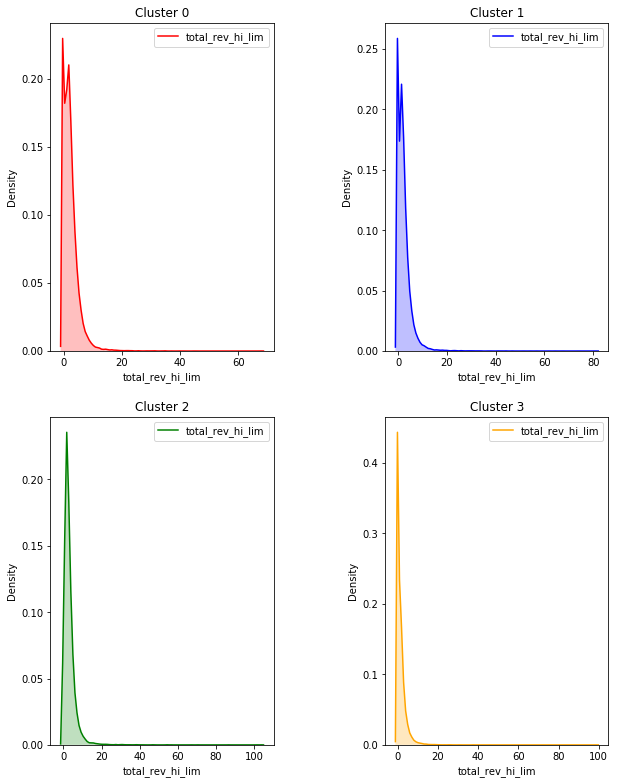

In [864]:
fig = plt.figure(figsize=(10,4))
# title = fig.suptitle(col[0], fontsize=14)
fig.subplots_adjust(top=4, wspace=0.5)

ax0 = fig.add_subplot(321)
ax0.set_title("Cluster 0")
ax0.set_xlabel(col[0])
ax0.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 0][col[0]], ax=ax0, shade=True, color='red')

ax1 = fig.add_subplot(322)
ax1.set_title("Cluster 1")
ax1.set_xlabel(col[0])
ax1.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 1][col[0]], ax=ax1, shade=True, color='blue')

ax2 = fig.add_subplot(323)
ax2.set_title("Cluster 2")
ax2.set_xlabel(col[0])
ax2.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 2][col[0]], ax=ax2, shade=True, color='green')

ax3 = fig.add_subplot(324)
ax3.set_title("Cluster 3")
ax3.set_xlabel(col[0])
ax3.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 3][col[0]], ax=ax3, shade=True, color='orange')

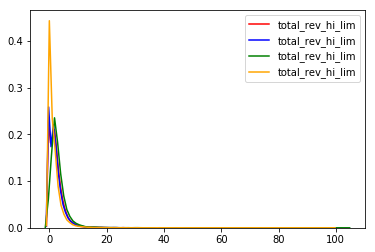

In [865]:
sns.kdeplot(x[y_kmeans == 0][col[0]], color = 'red')
sns.kdeplot(x[y_kmeans == 1][col[0]], color = 'blue')
sns.kdeplot(x[y_kmeans == 2][col[0]],  color = 'green')
sns.kdeplot(x[y_kmeans == 3][col[0]],  color = 'orange')
sns.kdeplot(x[y_kmeans == 4][col[0]],  color = 'cyan')

([array([8.654e+03, 5.194e+03, 2.494e+03, 1.156e+03, 0.000e+00, 2.580e+02,
         1.020e+02, 3.300e+01, 1.000e+00, 2.000e+00]),
  array([9.755e+03, 5.610e+03, 2.715e+03, 1.242e+03, 0.000e+00, 2.800e+02,
         1.180e+02, 2.400e+01, 3.000e+00, 0.000e+00]),
  array([4584., 2670., 1198.,  538.,    0.,  146.,   47.,   32.,    0.,
            0.]),
  array([6.638e+03, 3.707e+03, 1.751e+03, 7.700e+02, 0.000e+00, 1.970e+02,
         8.600e+01, 3.900e+01, 9.000e+00, 4.000e+00])],
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 4 Lists of Patches objects>)

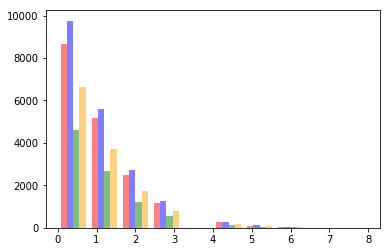

In [888]:
plt.hist([x[y_kmeans == 0][col[1]],
          x[y_kmeans == 1][col[1]],
          x[y_kmeans == 2][col[1]],
          x[y_kmeans == 3][col[1]]], color=['red','blue','green','orange'], alpha=0.5)

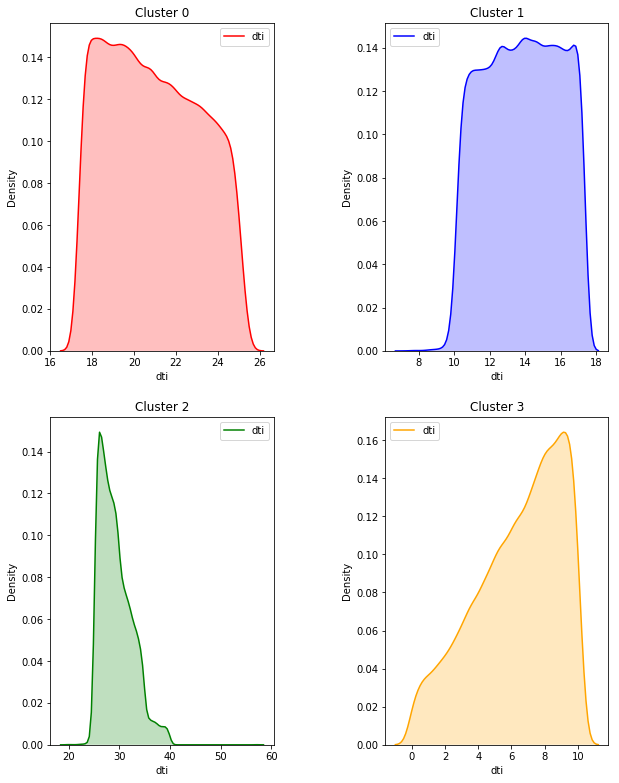

In [867]:
fig = plt.figure(figsize=(10,4))
# title = fig.suptitle(col[0], fontsize=14)
fig.subplots_adjust(top=4, wspace=0.5)

ax0 = fig.add_subplot(321)
ax0.set_title("Cluster 0")
ax0.set_xlabel(col[2])
ax0.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 0][col[2]], ax=ax0, shade=True, color='red')

ax1 = fig.add_subplot(322)
ax1.set_title("Cluster 1")
ax1.set_xlabel(col[2])
ax1.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 1][col[2]], ax=ax1, shade=True, color='blue')

ax2 = fig.add_subplot(323)
ax2.set_title("Cluster 2")
ax2.set_xlabel(col[2])
ax2.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 2][col[2]], ax=ax2, shade=True, color='green')

ax3 = fig.add_subplot(324)
ax3.set_title("Cluster 3")
ax3.set_xlabel(col[2])
ax3.set_ylabel("Density") 
sns.kdeplot(x[y_kmeans == 3][col[2]], ax=ax3, shade=True, color='orange')

c:\users\bordaka\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning:

invalid value encountered in true_divide



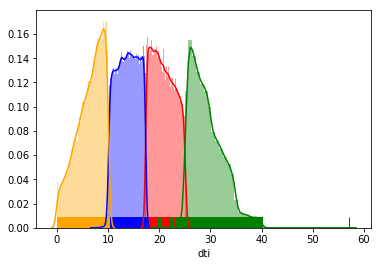

In [868]:
sns.distplot(x[y_kmeans == 0][col[2]], rug=True, color = 'red')
sns.distplot(x[y_kmeans == 1][col[2]],rug=True, color = 'blue')
sns.distplot(x[y_kmeans == 2][col[2]], rug=True, color = 'green')
sns.distplot(x[y_kmeans == 3][col[2]],  rug=True, color = 'orange')
sns.distplot(x[y_kmeans == 4][col[2]],  rug=True, color = 'cyan')

In [869]:
for i in range(0, 4):
    print("========Cluster:", i, "==========")
    print(x[y_kmeans == i].info())
    print(x[y_kmeans == i].mean())

========Cluster: 0 ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42092 entries, 81962 to 146867
Data columns (total 3 columns):
total_rev_hi_lim    42092 non-null float64
inq_last_6mths      42092 non-null float64
dti                 42092 non-null float64
dtypes: float64(3)
memory usage: 1.3 MB
None
total_rev_hi_lim     2.250101
inq_last_6mths       0.869334
dti                 20.961542
dtype: float64
========Cluster: 1 ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46104 entries, 27784 to 103694
Data columns (total 3 columns):
total_rev_hi_lim    46104 non-null float64
inq_last_6mths      46104 non-null float64
dti                 46104 non-null float64
dtypes: float64(3)
memory usage: 1.4 MB
None
total_rev_hi_lim     2.202808
inq_last_6mths       0.852659
dti                 13.809981
dtype: float64
========Cluster: 2 ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21405 entries, 193136 to 59735
Data columns (total 3 columns):
total_rev_hi_

In [870]:
from catboost import CatBoostClassifier, Pool, cv
import catboost as cb
import frozendict

In [871]:
params =  {'learning_rate': 0.01,
          'depth': 9.0,
        #  'rsm': 0.8789580279825991,
          'l2_leaf_reg': 29.083288170330242,
          'task_type': 'CPU',
          'loss_function': 'Logloss',
          'eval_metric': 'AUC', 'od_type': 'Iter',
          'od_wait': 40,
          'custom_metric': ['AUC'],
          'iterations': 4000,
          'random_seed': 42}

In [872]:
cats = []

In [873]:
len(y_kmeans == 1)

140132

In [874]:
len(x_train)

140132

In [875]:
for i in range(0, 4):
    print("================== processing cluster: ", i, "=======================")
    x_tr, x_te, y_tr, y_te = train_test_split(x_train[y_kmeans == i], y_train[y_kmeans == i], test_size=0.3, random_state = 42)
    train_pool = Pool(x_tr, y_tr, cat_features=categorical_features_indices)
    validate_pool = Pool(x_te, y_te, cat_features=categorical_features_indices)  
    best_model_params = params.copy()
    model = CatBoostClassifier(**best_model_params)
    model.fit(train_pool, eval_set=validate_pool,verbose=False,plot=True);
    cats.append(model)


================== processing cluster:  0 =======================


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

================== processing cluster:  1 =======================


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

================== processing cluster:  2 =======================


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

================== processing cluster:  3 =======================


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [876]:
cats

In [881]:
x =  x_test.loc[:,['total_rev_hi_lim','inq_last_6mths','dti']]
x['total_rev_hi_lim'] = x['total_rev_hi_lim'].fillna(0)
x['total_rev_hi_lim'] = x['total_rev_hi_lim']/10000
x.head()

total_rev_hi_lim  inq_last_6mths    dti
8644             -0.0999             1.0   1.74
20231             3.7400             0.0  18.26
63357             2.5200             2.0  13.97
121963           -0.0999             1.0   4.05
69643             1.1300             1.0  30.39

In [882]:
y_kmeans = kmeans.predict(x)

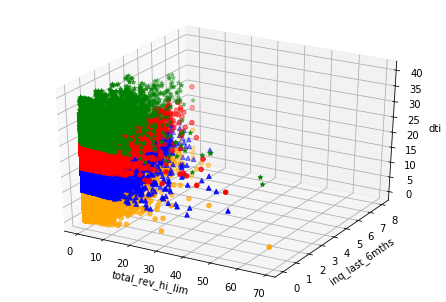

In [883]:
fig = plt.figure()
ax = Axes3D(fig)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i,c, m  in [(0,'red', 'o'), (1,'blue', '^'),(2,'green', '*'),(3,'orange', 'o'),(4,'cyan', 'o')]:
    xs = x[y_kmeans == i][col[0]]
    ys = x[y_kmeans == i][col[1]]
    zs = x[y_kmeans == i][col[2]]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(col[0])
ax.set_ylabel(col[1])
ax.set_zlabel(col[2])

plt.show()

In [884]:
for i in range(0, 4):
    print("========Cluster:", i, "==========")
    print(x[y_kmeans == i].info())
    print(x[y_kmeans == i].mean())

========Cluster: 0 ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17894 entries, 20231 to 191094
Data columns (total 3 columns):
total_rev_hi_lim    17894 non-null float64
inq_last_6mths      17894 non-null float64
dti                 17894 non-null float64
dtypes: float64(3)
memory usage: 559.2 KB
None
total_rev_hi_lim     2.210421
inq_last_6mths       0.861350
dti                 20.970279
dtype: float64
========Cluster: 1 ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19747 entries, 63357 to 24920
Data columns (total 3 columns):
total_rev_hi_lim    19747 non-null float64
inq_last_6mths      19747 non-null float64
dti                 19747 non-null float64
dtypes: float64(3)
memory usage: 617.1 KB
None
total_rev_hi_lim     2.209638
inq_last_6mths       0.842710
dti                 13.819826
dtype: float64
========Cluster: 2 ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9215 entries, 69643 to 130648
Data columns (total 3 columns):
total_rev_h

In [891]:
from sklearn.metrics import recall_score, roc_auc_score,precision_score,accuracy_score,roc_curve,make_scorer


In [892]:
def show_scores(model, x_test, y_test):
    pred =  model.predict(x_test)
    print('Recall: %.2f' % recall_score(y_test,pred))
    print('Precision score: %.2f' % precision_score(y_test,pred))
    print('Accuracy score: %.2f' % accuracy_score(y_test, pred))
    pred = model.predict_proba(x_test)
    print("ROC-AUC score: ", roc_auc_score(y_test, pred[:, 1]))

========Cluster: 0 ==========
Recall: 0.98
Precision score: 0.77
Accuracy score: 0.76
ROC-AUC score:  0.6873003834773599


c:\users\bordaka\appdata\local\programs\python\python37\lib\site-packages\catboost\core.py:1643: UserWarning:

fstr_type soon be deprecated, use type instead

The model has complex ctrs, so the SHAP values will be calculated approximately.


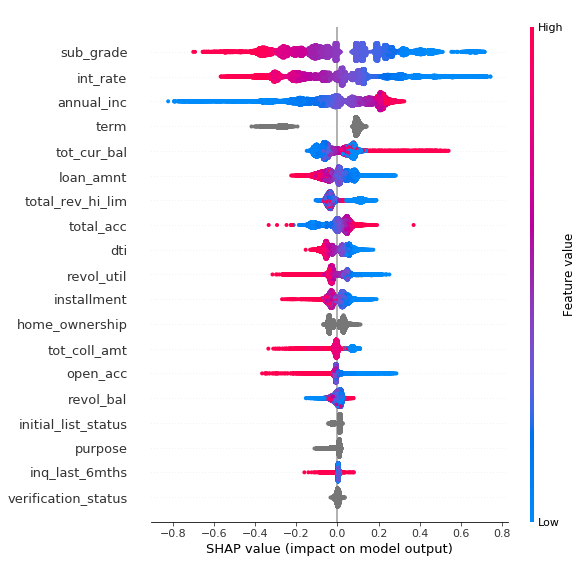

========Cluster: 1 ==========
Recall: 1.00
Precision score: 0.81
Accuracy score: 0.81
ROC-AUC score:  0.7062901379881399


c:\users\bordaka\appdata\local\programs\python\python37\lib\site-packages\catboost\core.py:1643: UserWarning:

fstr_type soon be deprecated, use type instead

The model has complex ctrs, so the SHAP values will be calculated approximately.


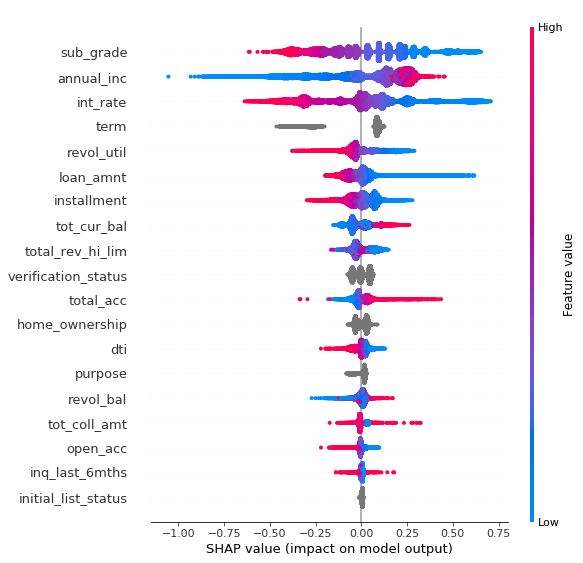

========Cluster: 2 ==========
Recall: 0.94
Precision score: 0.70
Accuracy score: 0.69
ROC-AUC score:  0.6640909809469457


c:\users\bordaka\appdata\local\programs\python\python37\lib\site-packages\catboost\core.py:1643: UserWarning:

fstr_type soon be deprecated, use type instead



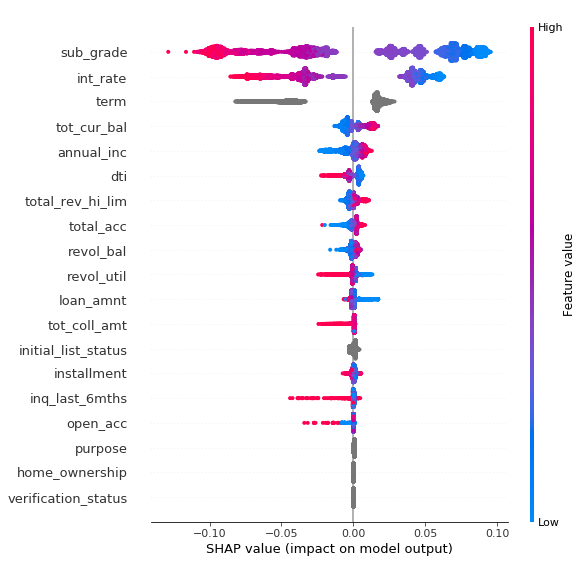

========Cluster: 3 ==========
Recall: 0.99
Precision score: 0.85
Accuracy score: 0.84
ROC-AUC score:  0.7033203111669677


c:\users\bordaka\appdata\local\programs\python\python37\lib\site-packages\catboost\core.py:1643: UserWarning:

fstr_type soon be deprecated, use type instead

The model has complex ctrs, so the SHAP values will be calculated approximately.


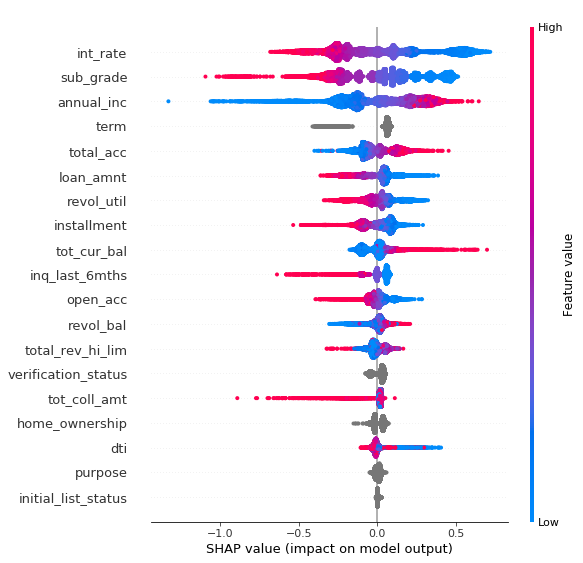

In [901]:
for i in range (0,4):
    print("========Cluster:", i, "==========")
    show_scores(cats[i],x_test[y_kmeans == i], y_test[y_kmeans == i] )
    explainer = shap.TreeExplainer(cats[i])
    shap_values = explainer.shap_values(Pool(x_test[y_kmeans == i], y_test[y_kmeans == i], cat_features=categorical_features_indices))
    shap.summary_plot(shap_values, x_test[y_kmeans == i])

In [895]:
import shap
shap.initjs()

In [ ]:
for cat in cats:
